In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.MultiGraph()
G.add_node(1)
G.add_node(2)
G.add_edges_from([(1, 2), (1, 2), (1,2)])

[0, 1, 2]

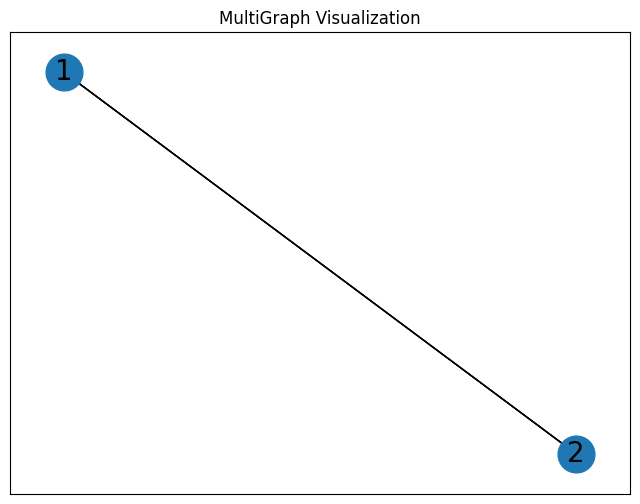

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=False)
nx.draw_networkx_labels(G, pos, font_size=20)

plt.title("MultiGraph Visualization")
plt.show()

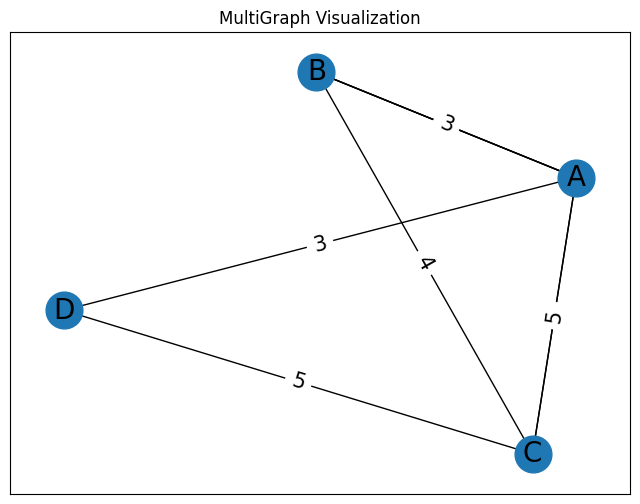

In [ ]:
MG = nx.MultiDiGraph()
MG.add_nodes_from(['A', 'B', 'C','D'])
MG.add_edge('A', 'B', capacity=3)
MG.add_edge('A', 'B', capacity=2)
MG.add_edge('B', 'C', capacity=4)
MG.add_edge('A', 'C', capacity=1)
MG.add_edge('A','B',capacity=3)
MG.add_edge('A','C',capacity=5)
MG.add_edge('C','D',capacity=5)
MG.add_edge('D','A',capacity=3)

pos = nx.spring_layout(MG)
plt.figure(figsize=(8, 6))

nx.draw_networkx_nodes(MG, pos, node_size=700)
nx.draw_networkx_edges(MG, pos, edgelist=MG.edges(), arrows=False)
edge_labels = nx.get_edge_attributes(MG, 'capacity')
nx.draw_networkx_edge_labels(MG, pos, edge_labels=edge_labels, font_size=15)
nx.draw_networkx_labels(MG, pos, font_size=20)

plt.title("MultiGraph Visualization")
plt.show()

In [ ]:
def multigraph_to_graph(multigraph, capacity='capacity'):
    G = nx.DiGraph()
    #if multigraph.is_directed() else nx.Graph()

    for u, v, data in multigraph.edges(data=True):
        if G.has_edge(u, v):
            G[u][v][capacity]+= data.get(capacity, 1)
        else:
            G.add_edge(u, v, **{capacity: data.get(capacity, 1)})
    return G

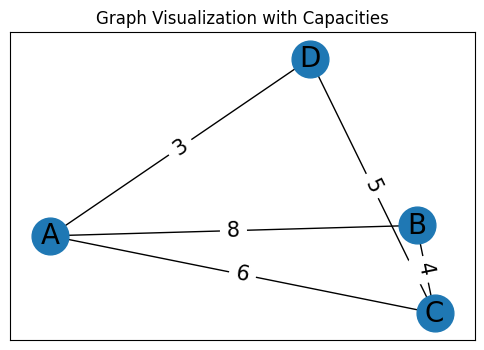

In [ ]:
G = multigraph_to_graph(MG, capacity='capacity')

pos = nx.spring_layout(G)

plt.figure(figsize=(6, 4))

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=False)
nx.draw_networkx_labels(G, pos, font_size=20)

edge_labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)

plt.title("Graph Visualization with Capacities")
plt.show()


In [ ]:
def multigraph_maximum_flow(MG, source, target, capacity='capacity'):
    G = multigraph_to_graph(MG,capacity=capacity)

    flow_value, flow_dict = nx.maximum_flow(G, source, target, capacity=capacity)
    return flow_value, flow_dict

In [ ]:
flow_value, flow_dict = multigraph_maximum_flow(MG, 'A', 'C')
print("Maximum flow:", flow_value)
print("Flow dict:", flow_dict)

Maximum flow: 10
Flow dict: {'A': {'B': 4, 'C': 6}, 'B': {'C': 4}, 'C': {'D': 0}, 'D': {'A': 0}}


In [ ]:
#Multigraph with 4 nodes
#Add some random amount of edges

#Assign capacity to nodes instead of edges and call maximum_flow on them
#When assigning capacity to the edges, assign the minimum capacity of the node to the edge
#Try not to use DiGraphs, but if you have to use it

### Start of Node Priority Testing ###

In [ ]:
D = nx.MultiGraph()
D.add_node('A',capacity=30, demand=2)
D.add_node('B',capacity=50, demand=-1)
D.add_node('C',capacity=20, demand=3)
D.add_node('D',capacity=20, demand=-4)
D.add_node('E',capacity=50,demand=0)

In [ ]:
def add_edge(graph, node_1, node_2, weight):
  cap_1 = graph.nodes[node_1]['capacity']
  cap_2 = graph.nodes[node_2]['capacity']
  graph.add_edge(node_1, node_2, capacity=min(cap_1, cap_2), weight=weight)

In [ ]:
add_edge(D, 'A','B',3)
add_edge(D, 'C', 'D',2)
add_edge(D, 'B', 'D',1)
add_edge(D, 'A','D',2)
add_edge(D, 'A','D',5)
add_edge(D, 'B','A',3)
add_edge(D, 'C', 'D',2)
add_edge(D, 'C', 'D',1)
add_edge(D, 'A','D',3)
add_edge(D, 'A','C',4)
add_edge(D, 'E', 'A',5)
add_edge(D, 'B', 'E',1)

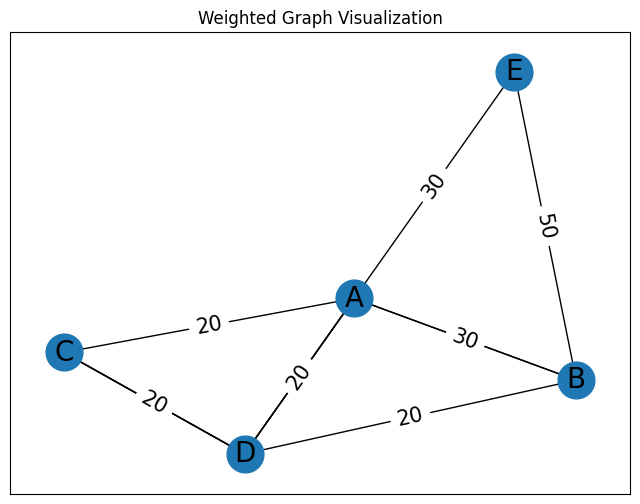

In [ ]:
pos = nx.spring_layout(D)
plt.figure(figsize=(8, 6))

nx.draw_networkx_nodes(D, pos, node_size=700)
nx.draw_networkx_edges(D, pos, edgelist=D.edges(), arrows=False)
edge_labels = nx.get_edge_attributes(D, 'capacity')
nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels, font_size=15)
nx.draw_networkx_labels(D, pos, font_size=20)

plt.title("Weighted Graph Visualization")
plt.show()

In [ ]:
D.edges(data=True)

MultiEdgeDataView([('A', 'B', {'capacity': 30, 'weight': 3}), ('A', 'B', {'capacity': 30, 'weight': 3}), ('A', 'D', {'capacity': 20, 'weight': 2}), ('A', 'D', {'capacity': 20, 'weight': 5}), ('A', 'D', {'capacity': 20, 'weight': 3}), ('A', 'C', {'capacity': 20, 'weight': 4}), ('A', 'E', {'capacity': 30, 'weight': 5}), ('B', 'D', {'capacity': 20, 'weight': 1}), ('B', 'E', {'capacity': 50, 'weight': 1}), ('C', 'D', {'capacity': 20, 'weight': 2}), ('C', 'D', {'capacity': 20, 'weight': 2}), ('C', 'D', {'capacity': 20, 'weight': 1})])

In [ ]:
test = multigraph_to_graph(D)

test.edges(data=True)

OutEdgeDataView([('A', 'B', {'capacity': 60}), ('A', 'D', {'capacity': 60}), ('A', 'C', {'capacity': 20}), ('A', 'E', {'capacity': 30}), ('B', 'D', {'capacity': 20}), ('B', 'E', {'capacity': 50}), ('C', 'D', {'capacity': 60})])

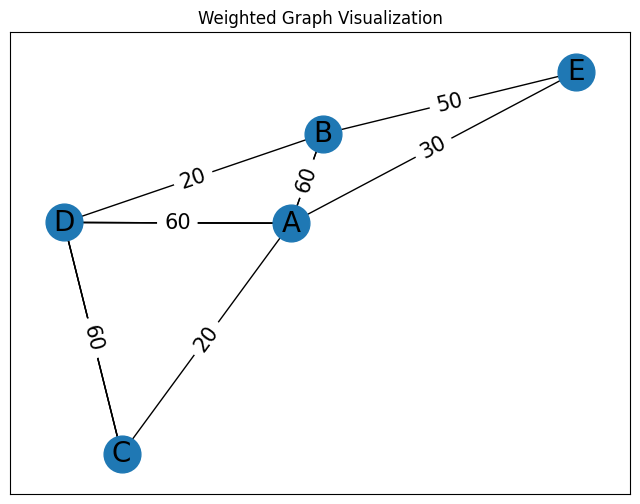

In [ ]:
pos = nx.spring_layout(test)
plt.figure(figsize=(8, 6))

nx.draw_networkx_nodes(test, pos, node_size=700)
nx.draw_networkx_edges(test, pos, edgelist=D.edges(), arrows=False)
edge_labels = nx.get_edge_attributes(test, 'capacity')
nx.draw_networkx_edge_labels(test, pos, edge_labels=edge_labels, font_size=15)
nx.draw_networkx_labels(test, pos, font_size=20)

plt.title("Weighted Graph Visualization")
plt.show()

In [ ]:
flow_value, flow_dict = multigraph_maximum_flow(test, 'A', 'E')
print("Maximum flow:", flow_value)
print("Flow dict:", flow_dict)

Maximum flow: 80
Flow dict: {'A': {'B': 50, 'D': 0, 'C': 0, 'E': 30}, 'B': {'D': 0, 'E': 50}, 'D': {}, 'C': {'D': 0}, 'E': {}}


In [ ]:
nx.max_flow_min_cost(test, 'A', 'E', capacity='capacity', weight='weight')

{'A': {'B': 50, 'D': 0, 'C': 0, 'E': 30},
 'B': {'D': 0, 'E': 50},
 'D': {},
 'C': {'D': 0},
 'E': {}}

In [ ]:
flow_dict, cost = nx.network_simplex(test, capacity='capacity', demand='demand')
print(flow_dict)
print(cost)

0
{'A': {'B': 0, 'D': 0, 'C': 0, 'E': 0}, 'B': {'D': 0, 'E': 0}, 'D': {}, 'C': {'D': 0}, 'E': {}}


In [ ]:
#Idea: Use network_simplex to calculate the most optimal flows between all nodes, temporarily converting weight to cost
#Then, using those bandwidths, divide those among each transfer according to priority (weight)

In [ ]:
def multigraph_to_digraph(multigraph, capacity='capacity', cost='cost'):
    # Create a new DiGraph
    G = nx.DiGraph()

    for u, v, data in multigraph.edges(data=True):
        # Get or initialize the capacity and cost
        current_capacity = G[u][v].get(capacity, 0) if G.has_edge(u, v) else 0
        current_cost = G[u][v].get(cost, 0) if G.has_edge(u, v) else 0

        # Update the capacity and cost
        new_capacity = current_capacity + data.get(capacity, 1)
        new_cost = current_cost + data.get('weight', 0)

        # Add or update the edge in the new graph
        G.add_edge(u, v, **{capacity: new_capacity, cost: new_cost})

    return G


In [ ]:
G = multigraph_to_digraph(D, capacity='capacity',cost='cost')

def print_graph_info(G):
    print("Nodes with Attributes:")
    for node, attrs in G.nodes(data=True):
        print(f"Node {node}: {attrs}")
    print("\nEdges with Attributes:")
    for u, v, attrs in G.edges(data=True):
        print(f"Edge ({u}, {v}): {attrs}")

print_graph_info(G)

Nodes with Attributes:
Node A: {}
Node B: {}
Node D: {}
Node C: {}
Node E: {}

Edges with Attributes:
Edge (A, B): {'capacity': 60, 'cost': 6}
Edge (A, D): {'capacity': 60, 'cost': 10}
Edge (A, C): {'capacity': 20, 'cost': 4}
Edge (A, E): {'capacity': 30, 'cost': 5}
Edge (B, D): {'capacity': 20, 'cost': 1}
Edge (B, E): {'capacity': 50, 'cost': 1}
Edge (C, D): {'capacity': 60, 'cost': 5}


In [ ]:
flow_dict, cost = nx.network_simplex(G)
print(flow_dict)
print(cost)

0
{'A': {'B': 0, 'D': 0, 'C': 0, 'E': 0}, 'B': {'D': 0, 'E': 0}, 'D': {}, 'C': {'D': 0}, 'E': {}}


In [ ]:
D = nx.MultiGraph()
D.add_node('A', capacity=30, demand=2)
D.add_node('B', capacity=50, demand=-1)
D.add_node('C', capacity=20, demand=3)
D.add_node('D', capacity=20, demand=-4)
D.add_node('E', capacity=50, demand=0)

def add_edge(graph, node_1, node_2, weight):
    cap_1 = graph.nodes[node_1]['capacity']
    cap_2 = graph.nodes[node_2]['capacity']
    graph.add_edge(node_1, node_2, capacity=min(cap_1, cap_2), weight=weight)

add_edge(D, 'A', 'B', 3)
add_edge(D, 'C', 'D', 2)
add_edge(D, 'B', 'D', 1)
add_edge(D, 'A', 'D', 2)
add_edge(D, 'A', 'D', 5)
add_edge(D, 'B', 'A', 3)
add_edge(D, 'C', 'D', 2)
add_edge(D, 'C', 'D', 1)
add_edge(D, 'A', 'D', 3)
add_edge(D, 'A', 'C', 4)
add_edge(D, 'E', 'A', 5)
add_edge(D, 'B', 'E', 1)

# Conversion function
def multigraph_to_graph(multigraph):
    G = nx.DiGraph()
    for u, v, data in multigraph.edges(data=True):
        if G.has_edge(u, v):
            G[u][v]['capacity'] += data['capacity']
        else:
            G.add_edge(u, v, capacity=data['capacity'])

    # Copy node attributes
    for node, data in multigraph.nodes(data=True):
        G.add_node(node, **data)

    return G

test = multigraph_to_graph(D)

print("Edges with capacities:")
for u, v, data in test.edges(data=True):
    print(f"{u}-{v}: {data}")

flow_dict, cost = nx.network_simplex(test, capacity='capacity', demand='demand')

print("\nFlow Dictionary:")
print(flow_dict)
print("\nTotal Cost:")
print(cost)


Edges with capacities:
A-B: {'capacity': 60}
A-D: {'capacity': 60}
A-C: {'capacity': 20}
A-E: {'capacity': 30}
B-D: {'capacity': 20}
B-E: {'capacity': 50}
C-D: {'capacity': 60}


NetworkXUnfeasible: no flow satisfies all node demands